# Coronavirus articles

En esta notebook mostraremos algunos 

In [ ]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")

db = client["hatespeech-news"]

print(f"Tenemos {Article.objects.count()} artículos")

Busquemos artículos con:

* 10 comentarios al menos
* Con al menos un comentario marcado como odioso
* Que hable de Coronavirus

In [9]:
Article.objects.distinct('user')

['LANACION',
 'LaVanguardia',
 'abc_es',
 'clarincom',
 'cronica',
 'elmundoes',
 'elpaisuy',
 'infobae',
 'izquierdadiario',
 'laderechadiario',
 'latercera',
 'pagina12',
 'perfilcom']

In [10]:
initial_query = {
    "user__in": ["LANACION", "clarincom", "cronica", "infobae", "perfilcom"]
    #comments__10__exists": True,
    #"comments__hateful_value__gt": 0.5
}

covid_terminos = [
    "coronavirus", "covid-19", "cuarentena", 
    "normalidad", "aislamiento", "padecimiento", "encierro", 
    "fase", "infectados", "Wuhan", "distanciamiento", "salud", "fiebre", "síntomas",
    # Palabras que sacamos porque no suman nada
    # "covid", "virus","ASPO"
]

dengue_terminos = [
    "dengue", "aedes", "mosquito", "descacharrar",
    "cacharro",
]

terminos = covid_terminos + dengue_terminos

print(f"Cantidad de artículos sin filtro por palabras: {Article.objects(**initial_query).count()}")


articles = Article.objects(**initial_query).search_text('Coronavirus')
print(articles.count())

Cantidad de artículos sin filtro por palabras: 48439
25307


In [ ]:
Y = [Article.objects(**initial_query).search_text(" ".join(covid_terminos[:i])).count() 
     for i in range(1, len(covid_terminos)+1)]

In [ ]:
import matplotlib.pyplot as plt

ticks = covid_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de artículos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de artículos recuperados al ir agregando términos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino-covid.png")


In [ ]:
import numpy as np

print("Términos que no suman nada")
for i in np.argwhere(np.abs(np.array(Y[:-1]) - np.array(Y[1:])) > 500):
    print(covid_terminos[i.item()+1])

Hay sólo dos palabras raras:

- Cuarentena
- salud

## Cuarentena

In [17]:
Article.objects(**initial_query).search_text("cuarentena -covid-19 -coronavirus").count()

1577

In [19]:
for article in Article.objects(**initial_query).search_text("cuarentena -covid-19 -coronavirus").limit(100):
    print("--")
    print(article.created_at)
    print(article.url)
    print(f"{article.user} -- {article.title}")
    print(f"{len(article.comments)} comentarios")

--
2020-05-07 22:00:22
https://www.perfil.com/noticias/economia/bajan-leliq-encajes-bancos-financien-pymes-sin-acceso-creditos.phtml
perfilcom -- El Central amplía medidas para financiar a las pyme sin acceso al crédito
1 comentarios
--
2020-04-29 00:53:01
https://www.cronica.com.ar/policiales/Violo-cuarentena-con-sorpresas-en-el-auto-llevaba-cocaina-y-a-su-hija-en-el-baul-20200428-0047.html
cronica -- Violó cuarentena con "sorpresas" en el auto: llevaba cocaína y a su hija en el baúl
3 comentarios
--
2020-05-07 14:24:53
https://bit.ly/2WxYCrS
cronica -- Georgina Barbarossa, solidaria durante la cuarentena
2 comentarios
--
2020-04-29 11:00:00
https://www.perfil.com/noticias/opinion/opinion-martin-balza-el-combate-en-el-monte-longdon-un-encarnizado-cuerpo-a-cuerpo.phtml
perfilcom -- El combate en el monte Longdon, un encarnizado cuerpo a cuerpo
1 comentarios
--
2020-05-13 16:05:17
https://www.diarioshow.com/por-la-red/More-Rial-embarazada-20200512-0031.html
cronica -- More Rial, ¿¡embar

## Salud

In [21]:
Article.objects(**initial_query).search_text("salud -cuarentena -covid-19 -coronavirus").count()

1621

In [22]:
for article in Article.objects(**initial_query).search_text("salud -cuarentena -covid-19 -coronavirus").limit(100):
    print("--")
    print(article.created_at)
    print(article.url)
    print(f"{article.user} -- {article.title}")
    print(f"{len(article.comments)} comentarios")

--
2020-05-23 15:20:00
https://www.perfil.com/noticias/opinion/ramon-carrillo-no-era-nazi-pero-uno-de-sus-asesores-si.phtml
perfilcom -- Ramón Carrillo no era nazi, pero uno de sus asesores sí
15 comentarios
--
2020-02-10 16:28:20
https://www.cronica.com.ar/politica/Alberto-Me-molesta-que-digan-que-tengo-presos-politicos-porque-no-los-tengo-20200210-0047.html
cronica -- Alberto: "Me molesta que digan que tengo presos políticos porque no los tengo"
9 comentarios
--
2020-03-28 04:05:00
https://www.diarioshow.com/farandula/Mataron-a-Hilda-Bernard-en-las-redes-y-su-familia-lo-desmintio-20200327-0006.html
cronica -- "Mataron" a Hilda Bernard en las redes y su familia lo desmintió
4 comentarios
--
2020-05-04 17:53:34
http://dlvr.it/RW0Ld9
LANACION -- Entre risas y con la marcha peronista de fondo, Andrés "Cuervo" Larroque juró como ministro de Axel Kicillof
70 comentarios
--
2020-05-31 19:53:02
http://dlvr.it/RXk3Kz
LANACION -- NASA y SpaceX: así fue el encuentro de los astronautas con la tr

## Dengue

In [26]:
nuevos_terminos = ["dengue", "aedes", "mosquito", "cacharro", "descacharrar"]

In [27]:
Y = [Article.objects(**initial_query).search_text(" ".join(nuevos_terminos[:i])).count() 
     for i in range(1, len(nuevos_terminos)+1)]

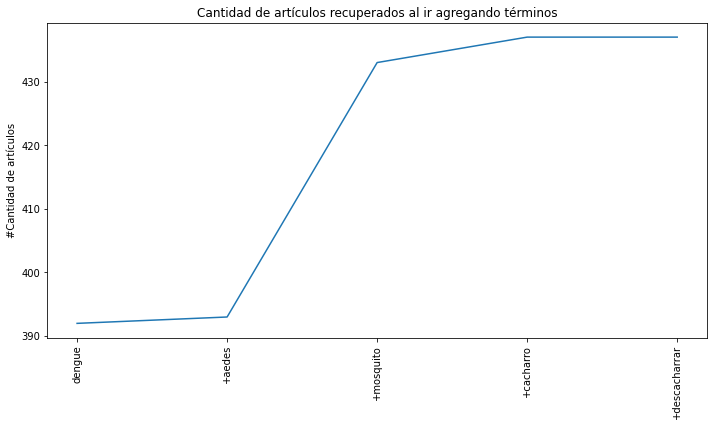

In [28]:
import matplotlib.pyplot as plt

ticks = nuevos_terminos.copy()
for i in range(1, len(ticks)):
    ticks[i] = f"+{ticks[i]}"

plt.figure(figsize=(10, 6))

X = list(range(len(ticks)))
plt.plot(X, Y)

plt.ylabel("#Cantidad de artículos")
plt.xticks(X, ticks, rotation=90);

plt.title("Cantidad de artículos recuperados al ir agregando términos")

plt.tight_layout(pad=1.0)
plt.savefig("articulos-termino-dengue.png")


In [29]:
articles = Article.objects(**initial_query).search_text("mosquito -dengue -coronavirus -cuarentena -covid-19")

print(articles.count())

for art in articles:
    print("="*80+'\n\n')
    print(art.created_at)
    print(art.url)
    
    print(art.body)
    print(art)

6


2020-03-19 21:24:55
https://www.clarin.com/fama/jorge-lanata-destrozo-mario-massaccesi-puta-vida-dio-noticia-_0_vC0FO7wkn.html?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1584653095
Que sirva de reconocimiento: los reportajes de Ulises Jaitt tienen "ese no sé qué". El show del espectáculo, el ciclo radial que tiene el hermano de Natacha en AM 1300 La Salada es un generador constante de escándalos y polémicas. Esta semana, fue el turno de Mario Massaccesi, quien habló de Jorge Lanata. Y ahora, llegó la respuesta.

En un tramo de la entrevista con Jaitt, el periodista de las noches del Trece hizo referencia a Lanata, y su comentario no le cayó nada bien al conductor de PPT. Ante la pregunta de si trabajaría con Jorge o con Víctor Hugo Morales, Massaccesi respondió: "No, estoy muy bien donde estoy y puedo elegir. No se me cruza trabajar con Lanata, Majul, Víctor Hugo… Con mucha gente que está en el candelero. Además, porque yo personalmente me he corrido del lugar d

## Salvamos

In [11]:
terminos = covid_terminos + dengue_terminos
terminos.remove("salud")

text_search = " ".join(terminos)
text_search, initial_query

('coronavirus covid-19 cuarentena normalidad aislamiento padecimiento encierro fase infectados Wuhan distanciamiento fiebre síntomas dengue aedes mosquito descacharrar cacharro',
 {'user__in': ['LANACION', 'clarincom', 'cronica', 'infobae', 'perfilcom']})

In [12]:

articles = Article.objects(**initial_query).search_text(text_search)

articles.count()

34667

In [ ]:
dates = [
    a.created_at for a in Article.objects(**initial_query).only("created_at").search_text(text_search)
]

RuntimeError: matplotlib does not support generators as input

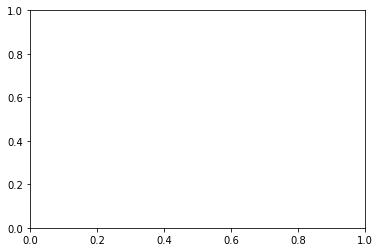

In [8]:
import matplotlib.pyplot as plt

plt.hist(art.created_at for art in articles)